# Machine Learning Models for Return Prediction
In this notebook, we explore various machine learning models for predicting financial returns. The models include:
- **Data Visualization**: Understanding the dataset through charts and correlation heatmaps.
- **Linear Regression**: A simple predictive model using all available features.
- **Feature Selection**: Using forward and backward selection to choose important predictors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset with two sheets: training and testing
train_data = pd.read_excel('data/Data_ret_pred.xlsx', sheet_name=0)
test_data = pd.read_excel('data/Data_ret_pred.xlsx', sheet_name=1)

# Display basic information about the training dataset
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yyyymm         860 non-null    int64  
 1   pd             860 non-null    float64
 2   eps            860 non-null    float64
 3   dy             860 non-null    float64
 4   b/m            860 non-null    float64
 5   tbl            860 non-null    float64
 6   CreditSpread   860 non-null    float64
 7   DefaultSpread  860 non-null    float64
 8   lty            860 non-null    float64
 9   ntis           860 non-null    float64
 10  infl           860 non-null    float64
 11  ltr            860 non-null    float64
 12  corpr          860 non-null    float64
 13  svar           860 non-null    float64
 14  ExReturns      860 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 100.9 KB
None
              yyyymm          pd         eps          dy         b/m  \
count     860.000

c:\Users\chuan\anaconda3\envs\my-py39-env\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


## Data Visualization
We start by visualizing the dataset to understand the distribution of features and correlations between them.

<Figure size 1200x600 with 0 Axes>

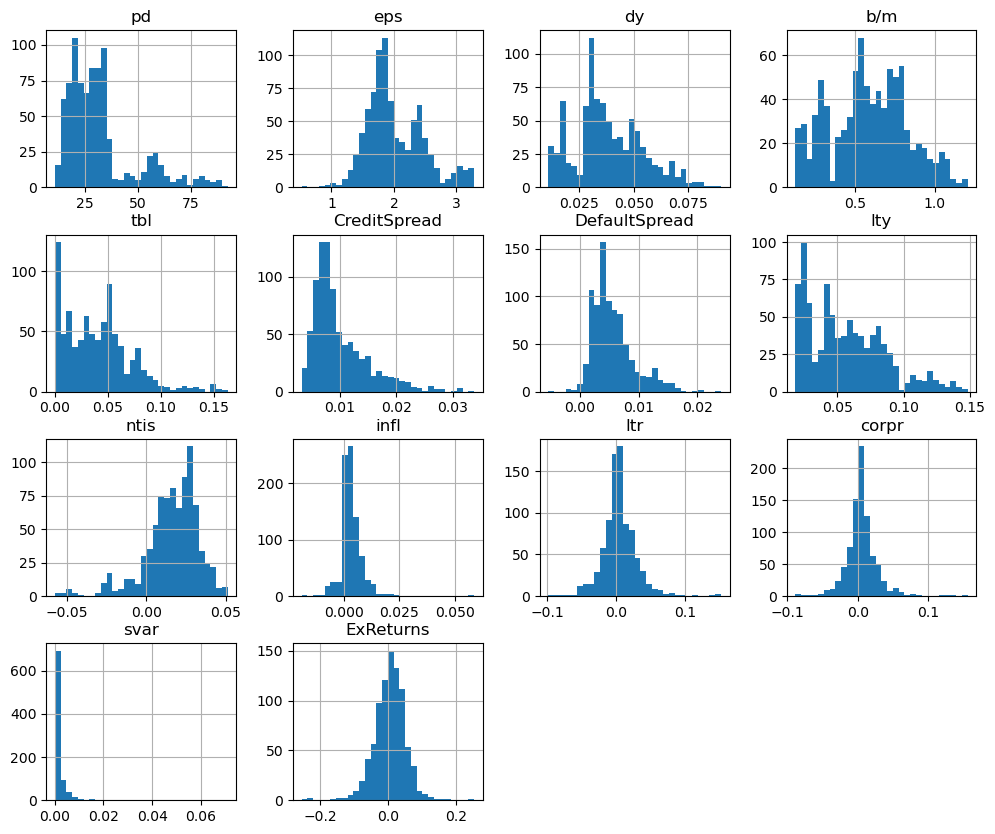

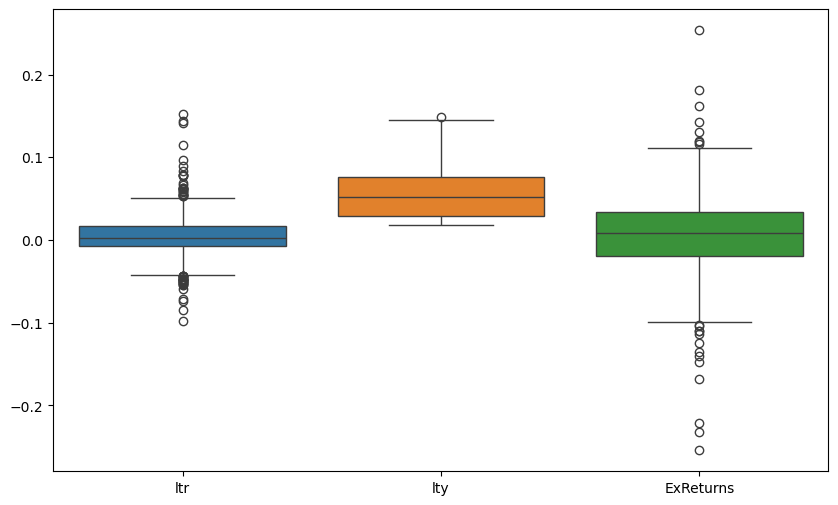

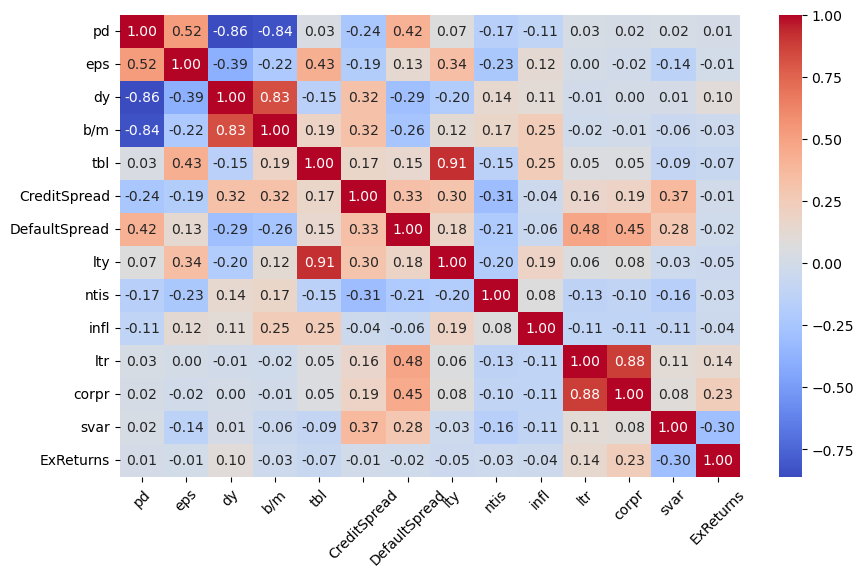

In [2]:
# Visualization using train data
plt.figure(figsize=(12, 6))
train_data.iloc[:,1:].hist(bins=30, figsize=(12, 10))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data[['ltr', 'lty', 'ExReturns' ]])
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.iloc[:,1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.show()

## Simple Regression Model
A basic linear regression model is used to predict returns using all available predictors.

In [2]:
# Define predictors and target
X_train = train_data.drop(columns=['ExReturns', 'yyyymm'])
X_test = test_data.drop(columns=['ExReturns', 'yyyymm'])
y_train = train_data['ExReturns']
y_test = test_data['ExReturns']

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simple Regression Model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')

Linear Regression MSE: 0.0014949378950819153


## Feature Selection
We apply forward and backward feature selection methods to choose important predictors.

## Sequential Feature Selector
Sequential Feature Selection (SFS) is a greedy procedure used to select a subset of features that optimize a given criterion.

### Procedure:
1. **Forward Selection:**
    - Starts with an empty set of features.
    - Iteratively adds the feature that results in the best model performance.
    - Continues until the stopping criterion is met.

2. **Backward Selection:**
    - Starts with all features included.
    - Iteratively removes the least important feature.
    - Continues until the stopping criterion is met.

### Selection Criterion:
- The feature selection process evaluates each subset using a performance metric, commonly **Mean Squared Error (MSE)** for regression problems.
- The feature that contributes the most to minimizing the error is chosen in forward selection.
- In backward selection, the feature that contributes the least is removed first.

### Stopping Rule:
- A predefined number of features is reached.
- Adding/removing features does not improve model performance significantly.
- The cross-validation score does not improve further.


Selected features (Forward Selection): Index(['dy', 'tbl', 'lty', 'ntis', 'corpr', 'svar'], dtype='object')
Selected features (Backward Selection): Index(['eps', 'tbl', 'lty', 'ntis', 'ltr', 'corpr', 'svar'], dtype='object')
MSE (OLS Model): 0.001495
MSE (SFS Forward Selection): 0.001525
MSE (SFS Backward Selection): 0.001434


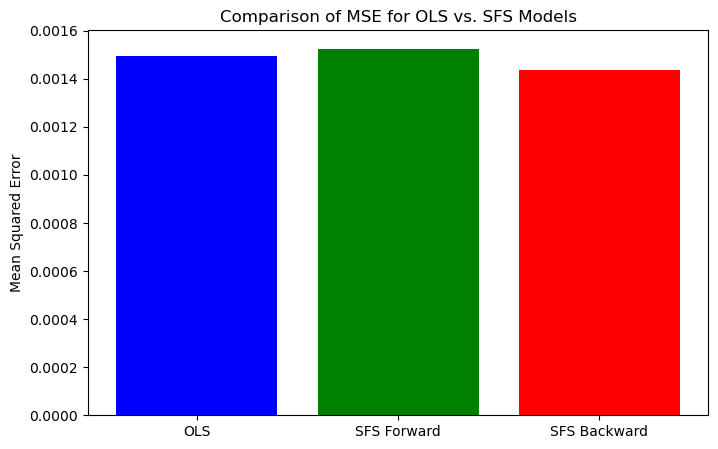

In [3]:
# Feature Selection
sfs_forward = SequentialFeatureSelector(LinearRegression(), direction='forward').fit(X_train_scaled, y_train)
sfs_backward = SequentialFeatureSelector(LinearRegression(), direction='backward').fit(X_train_scaled, y_train)

selected_features_forward = X_train.columns[sfs_forward.support_]
selected_features_backward = X_train.columns[sfs_backward.support_]

print('Selected features (Forward Selection):', selected_features_forward)
print('Selected features (Backward Selection):', selected_features_backward)

# Evaluate Sequential Feature Selector (SFS) model on test data
# Subset test data with selected features
X_train_selected_fwd = X_train[selected_features_forward]
X_test_selected_fwd = X_test[selected_features_forward]

X_train_selected_bwd = X_train[selected_features_backward]
X_test_selected_bwd = X_test[selected_features_backward]

# Train models using selected features
reg_fwd = LinearRegression()
reg_fwd.fit(X_train_selected_fwd, y_train)
y_pred_fwd = reg_fwd.predict(X_test_selected_fwd)
mse_fwd = mean_squared_error(y_test, y_pred_fwd)

reg_bwd = LinearRegression()
reg_bwd.fit(X_train_selected_bwd, y_train)
y_pred_bwd = reg_bwd.predict(X_test_selected_bwd)
mse_bwd = mean_squared_error(y_test, y_pred_bwd)

# Compare with original OLS model
mse_ols = mean_squared_error(y_test, y_pred)

print(f'MSE (OLS Model): {mse_ols:.6f}')
print(f'MSE (SFS Forward Selection): {mse_fwd:.6f}')
print(f'MSE (SFS Backward Selection): {mse_bwd:.6f}')

# Visualization of MSE Comparison
plt.figure(figsize=(8, 5))
models = ['OLS', 'SFS Forward', 'SFS Backward']
mse_values = [mse_ols, mse_fwd, mse_bwd]

plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE for OLS vs. SFS Models")
plt.show()